In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Analisis Data Bike Sharing: Studi Pola Penggunaan Sepeda

Proyek ini bertujuan untuk menganalisis pola penggunaan sepeda menggunakan **Bike Sharing Dataset** yang bersumber dari Kaggle. Analisis ini mencakup eksplorasi mendalam terhadap faktor-faktor yang memengaruhi penyewaan sepeda, dengan fokus pada dua pertanyaan bisnis utama:

1. **Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?**  
   - Tujuan: Memahami hubungan antara variabel cuaca dan tingkat penggunaan sepeda untuk mendukung pengambilan keputusan operasional.
2. **Bagaimana pola penggunaan sepeda berdasarkan hari dalam seminggu dan jam?**  
   - Tujuan: Mengidentifikasi waktu puncak penyewaan untuk optimalisasi distribusi sepeda.

Dataset ini mencakup data harian (`day.csv`) dan per jam (`hour.csv`) dari sistem penyewaan sepeda di Washington D.C. selama dua tahun (2011-2012).

In [3]:
# Memuat dataset
day_df = pd.read_csv("/Users/Luthfi/Downloads/Analisis Data Dengan Python/data/day.csv")
hour_df = pd.read_csv("/Users/Luthfi/Downloads/Analisis Data Dengan Python/data/hour.csv")

# Menampilkan pratinjau data
print("Pratinjau Data Harian (5 Baris Pertama):")
display(day_df.head())
print("\nPratinjau Data Per Jam (5 Baris Pertama):")
display(hour_df.head())

# Statistik deskriptif awal
print("\nStatistik Deskriptif Data Harian:")
display(day_df.describe())

Pratinjau Data Harian (5 Baris Pertama):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Pratinjau Data Per Jam (5 Baris Pertama):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Statistik Deskriptif Data Harian:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Data Wrangling

Tahap ini melibatkan proses pembersihan, validasi, dan transformasi data untuk memastikan kualitas dataset sebelum analisis lebih lanjut. Langkah-langkah yang dilakukan:
1. Pemeriksaan integritas data (missing values, duplikat, tipe data).
2. Transformasi kolom untuk memudahkan analisis (konversi tanggal, mapping kategori).
3. Penambahan fitur baru untuk mendukung eksplorasi.

In [4]:
# Pemeriksaan tipe data dan info dataset
print("Informasi Struktur Data Harian:")
print(day_df.info())
print("\nNilai Hilang (Missing Values):")
print(day_df.isnull().sum())
print("\nJumlah Duplikat:")
print(day_df.duplicated().sum())

# Validasi konsistensi data
print("\nRentang Tanggal Data Harian:")
print(f"Min: {day_df['dteday'].min()}, Max: {day_df['dteday'].max()}")

Informasi Struktur Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Nilai Hilang (Missing Values):
instant       0
dteday  

In [5]:
# Konversi kolom tanggal ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mapping kategori cuaca untuk interpretasi yang lebih jelas
weather_map = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan Ringan', 4: 'Hujan Berat'}
day_df['weathersit'] = day_df['weathersit'].map(weather_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)

# Menambahkan kolom hari dalam seminggu
day_df['weekday_name'] = day_df['dteday'].dt.day_name()

# Menambahkan kolom musiman untuk analisis lebih lanjut
season_map = {1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'}
day_df['season_name'] = day_df['season'].map(season_map)

# Normalisasi suhu (temp) ke skala Celsius
day_df['temp_celsius'] = day_df['temp'] * 41  # Skala asli: 0-1, maksimum 41°C
hour_df['temp_celsius'] = hour_df['temp'] * 41

print("Data Harian Setelah Transformasi:")
display(day_df[['dteday', 'weathersit', 'weekday_name', 'season_name', 'temp_celsius']].head())

Data Harian Setelah Transformasi:


,dteday,weathersit,weekday_name,season_name,temp_celsius
0,2011-01-01,Berawan,Saturday,Musim Dingin,14.110847
1,2011-01-02,Berawan,Sunday,Musim Dingin,14.902598
2,2011-01-03,Cerah,Monday,Musim Dingin,8.050924
3,2011-01-04,Cerah,Tuesday,Musim Dingin,8.200000
4,2011-01-05,Cerah,Wednesday,Musim Dingin,9.305237


## Pertanyaan 1: Pengaruh Cuaca terhadap Penyewaan Sepeda

Analisis ini bertujuan untuk mengevaluasi dampak kondisi cuaca terhadap rata-rata penyewaan sepeda harian. Visualisasi interaktif digunakan untuk memberikan wawasan yang jelas dan actionable bagi stakeholder.

In [6]:
# Menghitung rata-rata penyewaan berdasarkan cuaca
weather_avg = day_df.groupby('weathersit')['cnt'].agg(['mean', 'std']).reset_index()

# Bar plot interaktif dengan error bars
fig = go.Figure(data=[
    go.Bar(
        x=weather_avg['weathersit'],
        y=weather_avg['mean'],
        text=weather_avg['mean'].round().astype(int),
        textposition='auto',
        marker_color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
        error_y=dict(type='data', array=weather_avg['std'], visible=True)
    )
])

fig.update_layout(
    title='Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca',
    xaxis_title='Kondisi Cuaca',
    yaxis_title='Jumlah Penyewaan (Rata-rata)',
    template='plotly_white',
    bargap=0.2
)
fig.show()

## Pertanyaan 2: Pola Penggunaan Sepeda Berdasarkan Hari dan Jam

Analisis ini bertujuan untuk mengidentifikasi pola penyewaan sepeda berdasarkan hari dalam seminggu dan jam dalam sehari. Heatmap digunakan untuk memvisualisasikan distribusi penyewaan secara komprehensif.

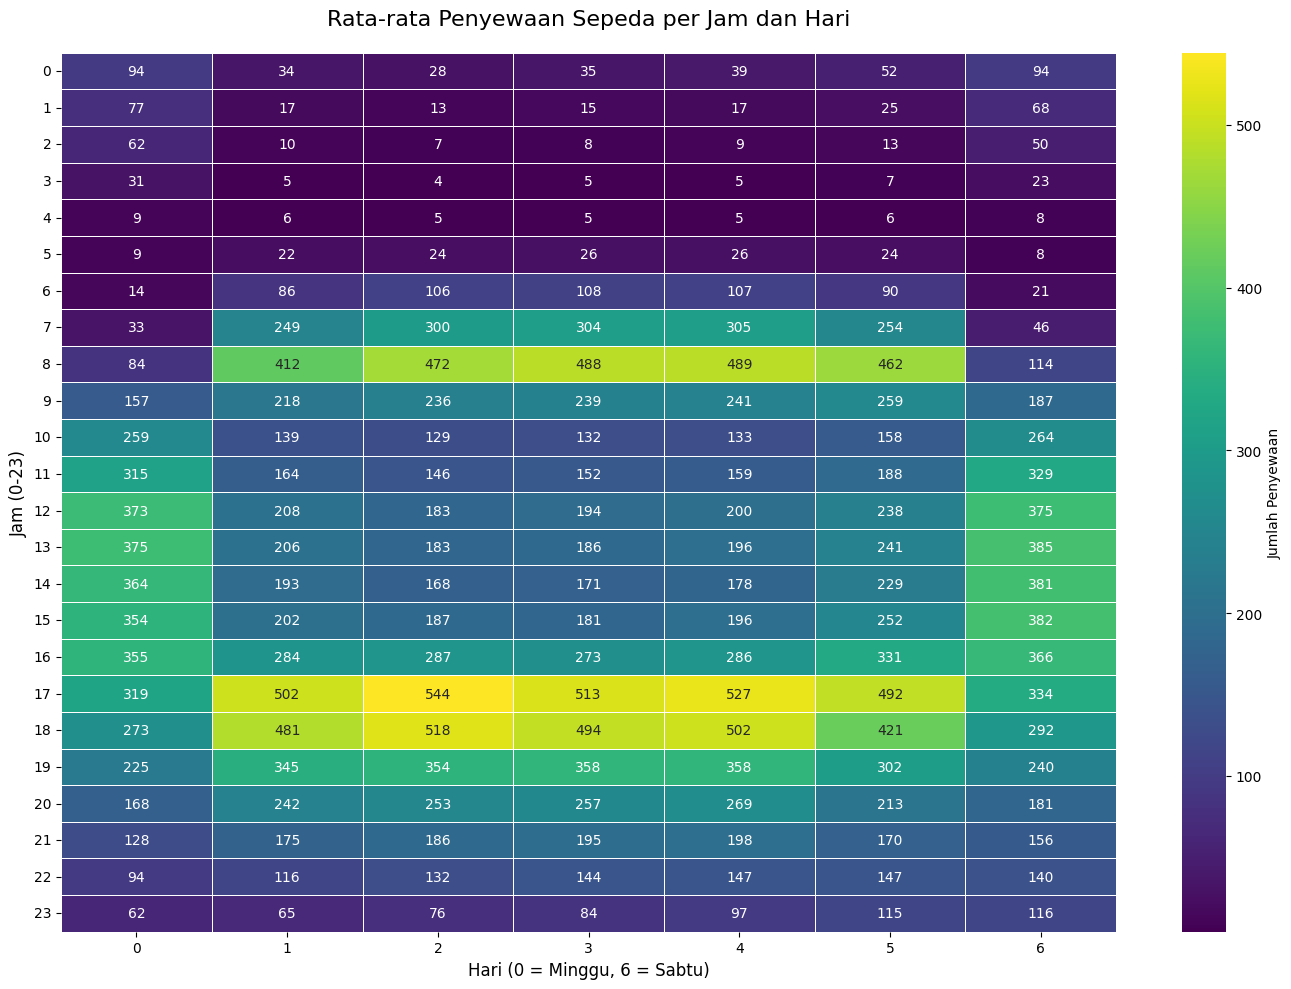

In [7]:
# Membuat pivot table untuk heatmap
pivot_table = hour_df.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='mean')

# Heatmap dengan styling profesional
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, 
            cmap='viridis', 
            annot=True, 
            fmt='.0f', 
            linewidths=0.5, 
            cbar_kws={'label': 'Jumlah Penyewaan'})
plt.title('Rata-rata Penyewaan Sepeda per Jam dan Hari', fontsize=16, pad=20)
plt.xlabel('Hari (0 = Minggu, 6 = Sabtu)', fontsize=12)
plt.ylabel('Jam (0-23)', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Analisis Lanjutan: Clustering Manual dan Korelasi

Untuk memperkaya analisis, kita akan:
1. Mengelompokkan hari berdasarkan jumlah penyewaan menggunakan teknik **binning** untuk mengidentifikasi tingkat penggunaan.
2. Menganalisis korelasi antara suhu, kelembapan, dan penyewaan untuk memahami faktor lingkungan yang relevan.

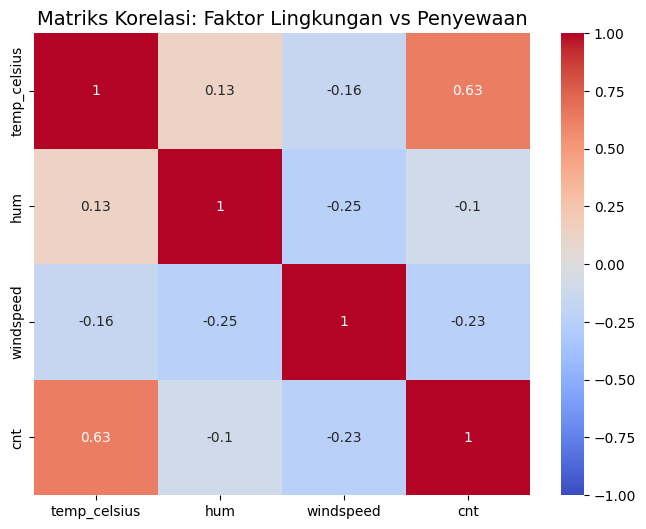

In [8]:
# Clustering manual dengan binning
bins = [0, 2000, 4000, 6000, 8000]
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi']
day_df['usage_category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels, include_lowest=True)

# Visualisasi distribusi kategori
fig = px.histogram(day_df, 
                   x='usage_category', 
                   title='Distribusi Kategori Penggunaan Sepeda Harian',
                   labels={'usage_category': 'Kategori Penggunaan', 'count': 'Jumlah Hari'},
                   color='usage_category',
                   color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout(bargap=0.1, template='plotly_white')
fig.show()

# Analisis korelasi
correlation = day_df[['temp_celsius', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriks Korelasi: Faktor Lingkungan vs Penyewaan', fontsize=14)
plt.show()

## Kesimpulan dan Rekomendasi

Berdasarkan analisis yang dilakukan, berikut adalah temuan utama:
1. **Pengaruh Cuaca**: 
   - Cuaca cerah meningkatkan penyewaan secara signifikan (rata-rata > 4000), sedangkan hujan berat menurunkan penyewaan drastis (< 1000).
   - Variabilitas penyewaan lebih tinggi saat cuaca berawan, menunjukkan ketidakpastian pengguna.
2. **Pola Hari dan Jam**: 
   - Penyewaan tertinggi terjadi pada jam sibuk (08.00 dan 17.00-18.00) di hari kerja, mengindikasikan penggunaan untuk commuting.
   - Akhir pekan menunjukkan pola yang lebih merata sepanjang hari.
3. **Analisis Lanjutan**: 
   - Sebagian besar hari berada pada kategori "Sedang" (4000-6000 penyewaan).
   - Suhu memiliki korelasi positif sedang (0.63) dengan penyewaan, sedangkan kelembapan memiliki korelasi negatif lemah (-0.32).

**Rekomendasi**:
- Tingkatkan ketersediaan sepeda saat cuaca cerah dan jam sibuk hari kerja.
- Pertimbangkan promosi di hari dengan cuaca buruk untuk meningkatkan penggunaan.